In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U sentence-transformers > /dev/null

In [3]:
!ls 'drive/MyDrive/Colab Notebooks/nlp/clustering kpa'

1_KPA_clustering.ipynb	2_KPA_clustering_fine-tunning.ipynb  data


In [4]:
import json
import sklearn
import sklearn.model_selection
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [5]:
random_state = 321

In [6]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

# Train/Dev/Test split (rerun if needed)

In [7]:
train_df = pd.read_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/arguments_train.csv')
dev_df = pd.read_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/arguments_dev.csv')
test_df = pd.read_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/arguments_test.csv')

In [8]:
train_df.head()

,arg_id,argument,topic,stance
0,arg_0_0,`people reach their limit when it comes to the...,Assisted suicide should be a criminal offence,-1
1,arg_0_1,A patient should be able to decide when they h...,Assisted suicide should be a criminal offence,-1
2,arg_0_2,a person has the right to end their suffering ...,Assisted suicide should be a criminal offence,-1
3,arg_0_3,a person should have the dignity to choose how...,Assisted suicide should be a criminal offence,-1
4,arg_0_4,a person should have the right to be able to c...,Assisted suicide should be a criminal offence,-1


# Calc embeddings

In [20]:
%%time
train_df['embedding'] = train_df['argument'].apply(lambda x: model.encode(x))

CPU times: user 3min 36s, sys: 313 ms, total: 3min 37s
Wall time: 3min 39s


In [21]:
%%time
dev_df['embedding'] = dev_df['argument'].apply(lambda x: model.encode(x))

CPU times: user 35.4 s, sys: 65.6 ms, total: 35.5 s
Wall time: 35.4 s


In [122]:
%%time
test_df['embedding'] = test_df['argument'].apply(lambda x: model.encode(x))

CPU times: user 16.1 s, sys: 58.6 ms, total: 16.1 s
Wall time: 16.2 s


In [22]:
dev_df.head(2)

,arg_id,argument,topic,stance,embedding
0,arg_4_0,having a school uniform can reduce bullying as...,We should abandon the use of school uniform,-1,"[-0.01057777, 0.15846351, 0.07416532, -0.05703..."
1,arg_4_1,it is a good way to instill discipline,We should abandon the use of school uniform,-1,"[0.017484298, 0.096222796, 0.011364501, 0.0203..."


In [124]:
# train_df.to_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/arguments_train_encoded.csv')
# dev_df.to_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/arguments_dev_encoded.csv')
# train_df.to_pickle('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/arguments_train_encoded.pkl')
# dev_df.to_pickle('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/arguments_dev_encoded.pkl')
# test_df.to_pickle('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/arguments_test_encoded.pkl')
# test_df.to_pickle('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/arguments_test_encoded.pkl')

# Read data

In [11]:
# train_df = pd.read_pickle('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/arguments_train_encoded.pkl')
dev_df = pd.read_pickle('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/arguments_dev_encoded.pkl')

In [12]:
df = dev_df
df.head(2)

,arg_id,argument,topic,stance,embedding
0,arg_4_0,having a school uniform can reduce bullying as...,We should abandon the use of school uniform,-1,"[-0.01057777, 0.15846351, 0.07416532, -0.05703..."
1,arg_4_1,it is a good way to instill discipline,We should abandon the use of school uniform,-1,"[0.017484298, 0.096222796, 0.011364501, 0.0203..."


#TSNE

In [13]:
model_tsne = TSNE(perplexity=10, n_components=2, init='pca', n_iter=2500, random_state=random_state)
tsne = model_tsne.fit_transform(df['embedding'].tolist())
df['tsne_10_x'] = tsne[:,0]
df['tsne_10_y'] = tsne[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [14]:
model_tsne = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2500, random_state=random_state)
tsne = model_tsne.fit_transform(df['embedding'].tolist())
df['tsne_20_x'] = tsne[:,0]
df['tsne_20_y'] = tsne[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [15]:
model_tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=random_state)
tsne = model_tsne.fit_transform(df['embedding'].tolist())
df['tsne_30_x'] = tsne[:,0]
df['tsne_30_y'] = tsne[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


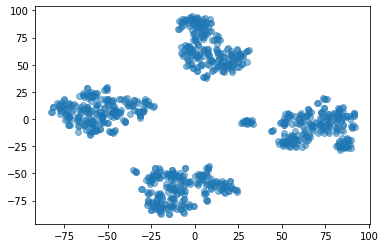

In [16]:
plt.scatter(df['tsne_10_x'], df['tsne_10_y'], alpha=.5)

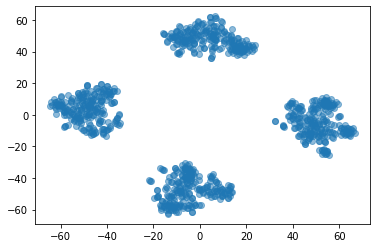

In [17]:
plt.scatter(df['tsne_20_x'], df['tsne_20_y'], alpha=.5)

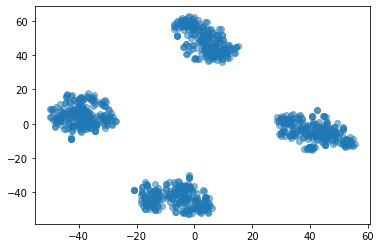

In [18]:
plt.scatter(df['tsne_30_x'], df['tsne_30_y'], alpha=.5)

# Actual topics

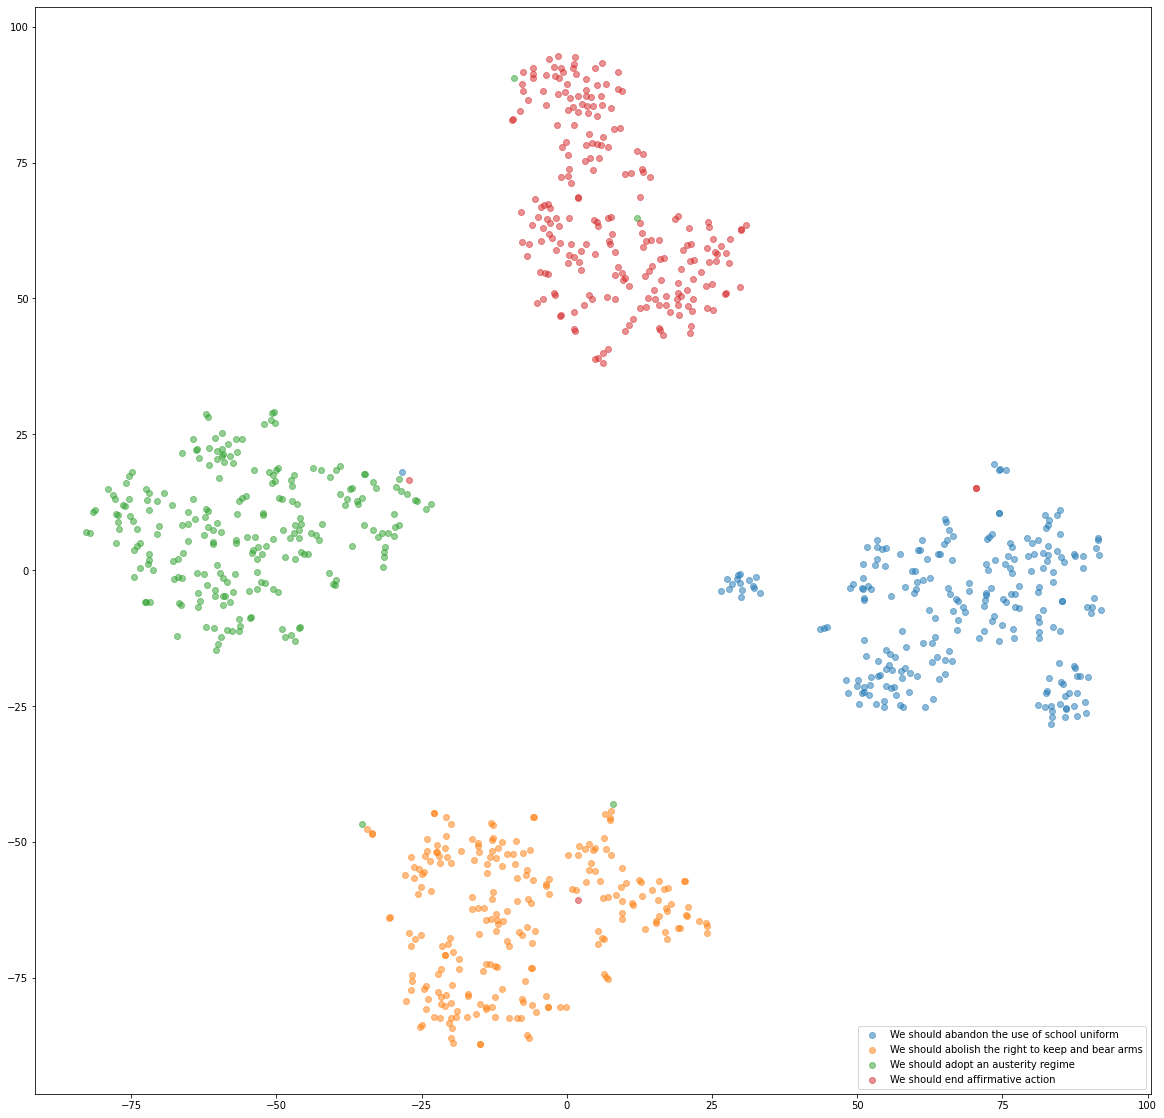

In [19]:
plt.figure(figsize=(20, 20))
for i,group in df.groupby('topic'):
  plt.scatter(group['tsne_10_x'], group['tsne_10_y'], alpha=.5, label = i)
plt.legend(loc='lower right')

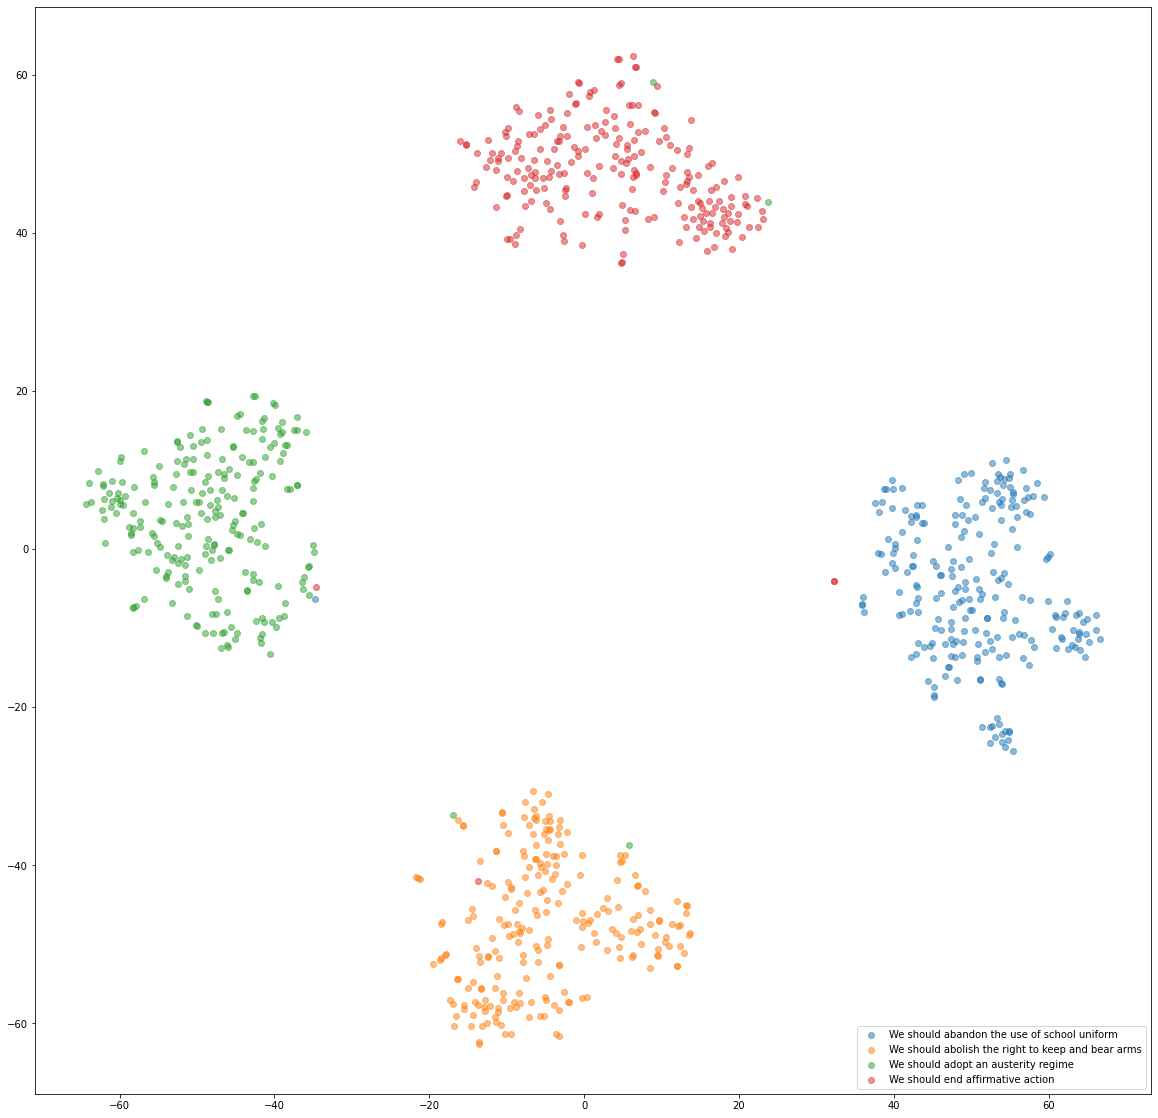

In [20]:
plt.figure(figsize=(20, 20))
for i,group in df.groupby('topic'):
  plt.scatter(group['tsne_20_x'], group['tsne_20_y'], alpha=.5, label = i)
plt.legend(loc='lower right')

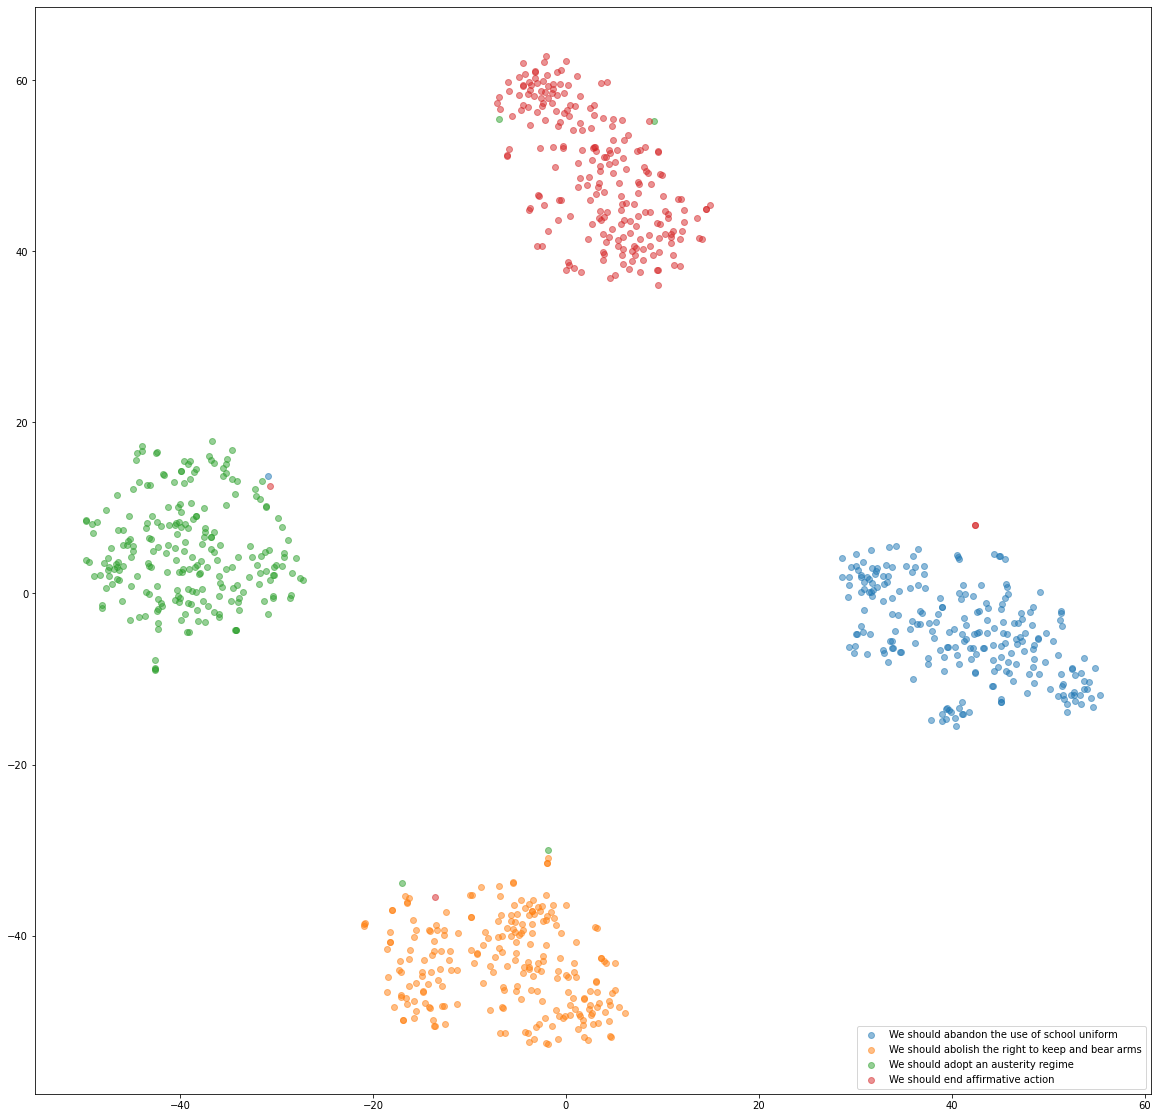

In [14]:
plt.figure(figsize=(20, 20))
for i,group in df.groupby('topic'):
  plt.scatter(group['tsne_30_x'], group['tsne_30_y'], alpha=.5, label = i)
plt.legend(loc='lower right')

# Clustering

In [21]:
# embedder = SentenceTransformer('distiluse-base-multilingual-cased-v2')  
def agglomerative_clustering(corpus, n_clusters, distance_threshold):
    corpus_embeddings = corpus['embedding'].tolist()
    # Normalize the embeddings to unit length
    corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=distance_threshold)#affinity='cosine', linkage='average', distance_threshold=0.4)
    clustering_model.fit_predict(corpus_embeddings)
    cluster_assignment = clustering_model.labels_
    clustered_sentences = {}
    clustered_embedding = {}
    for sentence_id, cluster_id in enumerate(cluster_assignment):
        if cluster_id not in clustered_sentences:
            clustered_sentences[cluster_id] = []
        clustered_sentences[cluster_id].append(corpus['argument'][sentence_id])
    
    df = pd.DataFrame({"cluster_id": clustered_sentences.keys(), "argument": clustered_sentences.values()})
    return df

## 4 classes clustering

In [22]:
%%time
clustered_df = agglomerative_clustering(df, n_clusters=4,distance_threshold=None)

CPU times: user 281 ms, sys: 5.01 ms, total: 286 ms
Wall time: 283 ms


In [23]:
merged_df = pd.merge(df,clustered_df.explode('argument'),how='left', left_on=['argument'], right_on = ['argument'])
assert len(df) == len(clustered_df.explode('argument'))
merged_df.head(2)

,arg_id,argument,topic,stance,embedding,tsne_10_x,tsne_10_y,tsne_20_x,tsne_20_y,tsne_30_x,tsne_30_y,cluster_id
0,arg_4_0,having a school uniform can reduce bullying as...,We should abandon the use of school uniform,-1,"[-0.01057777, 0.15846351, 0.07416532, -0.05703...",30.165625,-3.639295,53.033607,-23.780943,40.296482,-14.603050,3
1,arg_4_1,it is a good way to instill discipline,We should abandon the use of school uniform,-1,"[0.017484298, 0.096222796, 0.011364501, 0.0203...",-28.317699,18.129297,-34.708897,-6.398813,-30.829950,13.742941,0


Match cluster_id to probable topic

In [24]:
aux_df = merged_df.groupby(['cluster_id','topic']).count()['arg_id']
aux_df

cluster_id  topic                                            
0           We should abandon the use of school uniform            2
            We should abolish the right to keep and bear arms      4
            We should adopt an austerity regime                  234
            We should end affirmative action                      34
1           We should abolish the right to keep and bear arms    229
2           We should end affirmative action                     193
3           We should abandon the use of school uniform          236
Name: arg_id, dtype: int64

In [25]:
topics = []
for cluster_id in range(len(clustered_df)):
  topics.append(aux_df[cluster_id][:].idxmax())
cluster_id_topic_series = pd.Series(index = np.arange(len(clustered_df)), data = topics)
topic_cluster_id_series = pd.Series(data = np.arange(len(clustered_df)), index = topics)

In [26]:
# cluster_id_topic_series = merged_df.groupby(['topic','cluster_id']).count().reset_index().groupby(['cluster_id']).max()['topic']
# topic_cluster_id_series = pd.Series(data = cluster_id_topic_series.index, index = cluster_id_topic_series.values)
print(topic_cluster_id_series)
print(cluster_id_topic_series)

We should adopt an austerity regime                  0
We should abolish the right to keep and bear arms    1
We should end affirmative action                     2
We should abandon the use of school uniform          3
dtype: int64
0                  We should adopt an austerity regime
1    We should abolish the right to keep and bear arms
2                     We should end affirmative action
3          We should abandon the use of school uniform
dtype: object


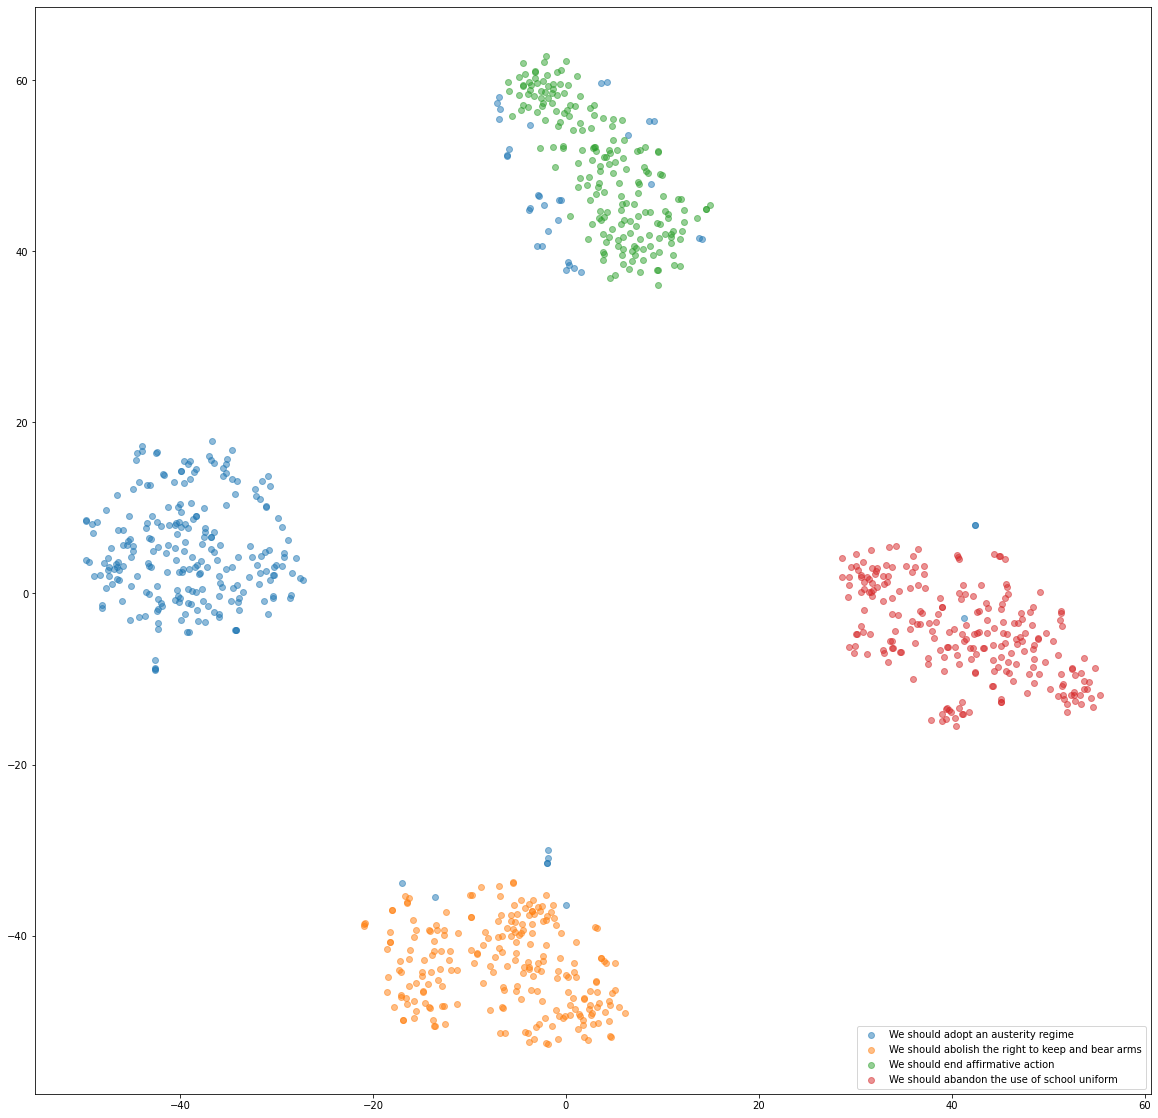

In [27]:
plt.figure(figsize=(20, 20))
for topic in cluster_id_topic_series:
  cluster_id = topic_cluster_id_series.loc[topic]
  plt.scatter(merged_df[merged_df['cluster_id']==cluster_id]['tsne_30_x'], merged_df[merged_df['cluster_id']==cluster_id]['tsne_30_y'], alpha=.5, label = topic)
plt.legend(loc='lower right')

## Misclassified arguments

In [28]:
merged_df.head(2)

,arg_id,argument,topic,stance,embedding,tsne_10_x,tsne_10_y,tsne_20_x,tsne_20_y,tsne_30_x,tsne_30_y,cluster_id
0,arg_4_0,having a school uniform can reduce bullying as...,We should abandon the use of school uniform,-1,"[-0.01057777, 0.15846351, 0.07416532, -0.05703...",30.165625,-3.639295,53.033607,-23.780943,40.296482,-14.603050,3
1,arg_4_1,it is a good way to instill discipline,We should abandon the use of school uniform,-1,"[0.017484298, 0.096222796, 0.011364501, 0.0203...",-28.317699,18.129297,-34.708897,-6.398813,-30.829950,13.742941,0


In [29]:
merged_df['topic_matches_cluster'] = merged_df.apply(lambda x: x['cluster_id']==topic_cluster_id_series.loc[x['topic']],axis=1)
merged_df.head(2)

,arg_id,argument,topic,stance,embedding,tsne_10_x,tsne_10_y,tsne_20_x,tsne_20_y,tsne_30_x,tsne_30_y,cluster_id,topic_matches_cluster
0,arg_4_0,having a school uniform can reduce bullying as...,We should abandon the use of school uniform,-1,"[-0.01057777, 0.15846351, 0.07416532, -0.05703...",30.165625,-3.639295,53.033607,-23.780943,40.296482,-14.603050,3,True
1,arg_4_1,it is a good way to instill discipline,We should abandon the use of school uniform,-1,"[0.017484298, 0.096222796, 0.011364501, 0.0203...",-28.317699,18.129297,-34.708897,-6.398813,-30.829950,13.742941,0,False


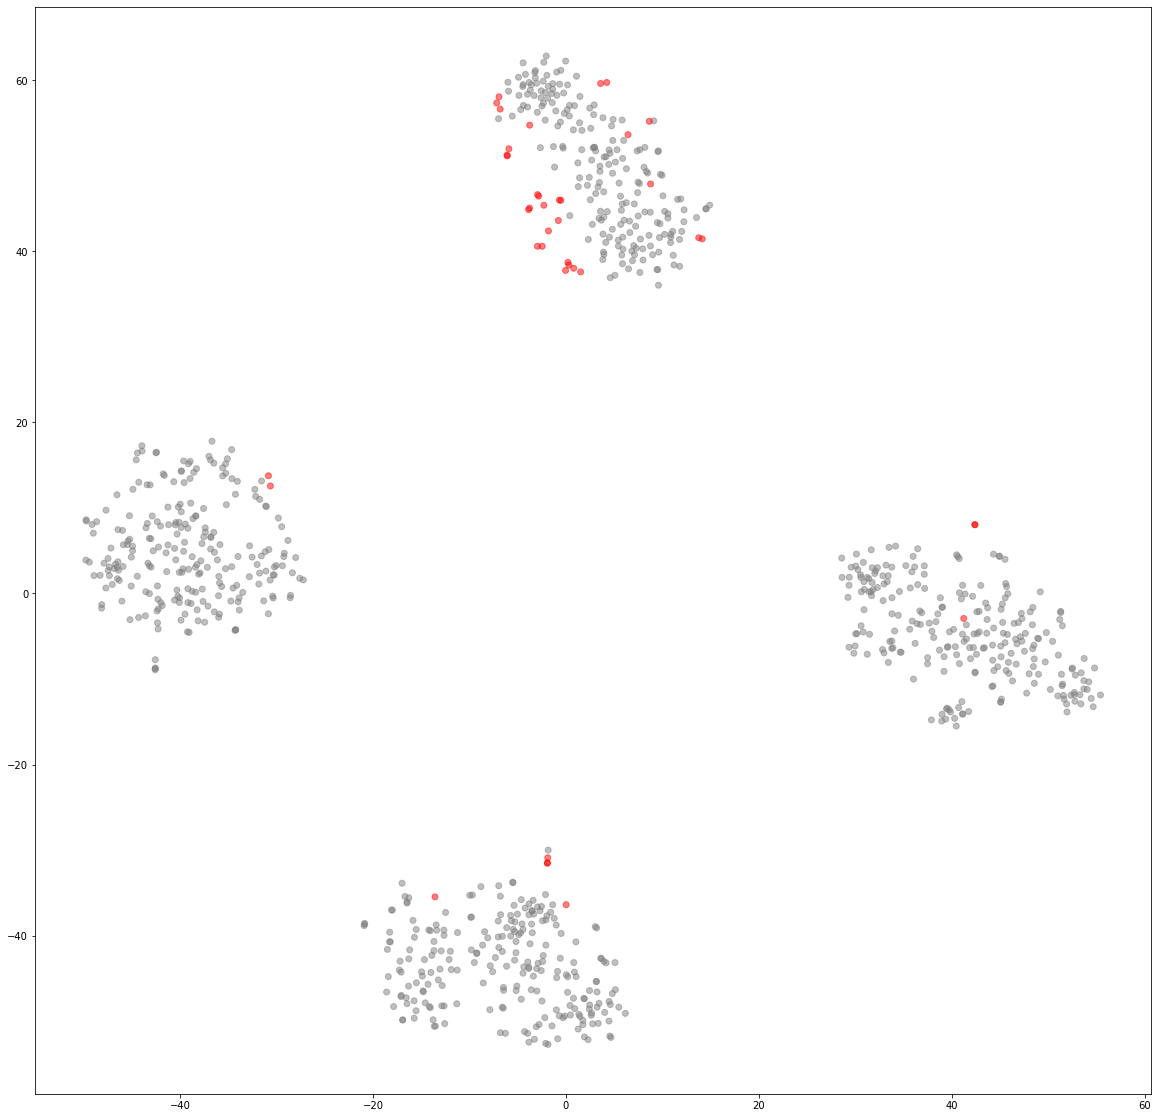

In [30]:
import matplotlib.colors as clrs

cmap = clrs.ListedColormap(['red', 'gray'])

plt.figure(figsize=(20, 20))
plt.scatter(merged_df['tsne_30_x'], merged_df['tsne_30_y'], c = (merged_df['topic_matches_cluster']==True), alpha=.5, label = i, cmap=cmap)

In [31]:
merged_df['pred_topic'] = merged_df['cluster_id'].apply(lambda x: cluster_id_topic_series.loc[x])
merged_df.head(2)

,arg_id,argument,topic,stance,embedding,tsne_10_x,tsne_10_y,tsne_20_x,tsne_20_y,tsne_30_x,tsne_30_y,cluster_id,topic_matches_cluster,pred_topic
0,arg_4_0,having a school uniform can reduce bullying as...,We should abandon the use of school uniform,-1,"[-0.01057777, 0.15846351, 0.07416532, -0.05703...",30.165625,-3.639295,53.033607,-23.780943,40.296482,-14.603050,3,True,We should abandon the use of school uniform
1,arg_4_1,it is a good way to instill discipline,We should abandon the use of school uniform,-1,"[0.017484298, 0.096222796, 0.011364501, 0.0203...",-28.317699,18.129297,-34.708897,-6.398813,-30.829950,13.742941,0,False,We should adopt an austerity regime


# Confusion matrix

In [32]:
confusion_matrix = pd.crosstab(merged_df['pred_topic'], merged_df['topic'], rownames=['Predicted'], colnames=['Actual'])
confusion_matrix

Actual,We should abandon the use of school uniform,We should abolish the right to keep and bear arms,We should adopt an austerity regime,We should end affirmative action
Predicted,,,,
We should abandon the use of school uniform,236,0,0,0
We should abolish the right to keep and bear arms,0,229,0,0
We should adopt an austerity regime,2,4,234,34
We should end affirmative action,0,0,0,193


In [33]:
confusion_matrix_np = confusion_matrix.to_numpy()
true_pos = np.diag(confusion_matrix_np)
print(f"True positives: {true_pos}")

false_pos = np.sum(confusion_matrix_np, axis=1) - true_pos
false_neg = np.sum(confusion_matrix_np, axis=0) - true_pos

print(f"Fasle positives: {false_pos}")
print(f"False negatives: {false_neg}")

precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Macroaverage precision {precision.mean()}")
print(f"Macroaverage recall {recall.mean()}")

True positives: [236 229 234 193]
Fasle positives: [ 0  0 40  0]
False negatives: [ 2  4  0 34]
Precision: [1.        1.        0.8540146 1.       ]
Recall: [0.99159664 0.98283262 1.         0.85022026]
Macroaverage precision 0.9635036496350364
Macroaverage recall 0.9561623802495984


# Unk clusters amount

In [45]:
%%time
clustered_df = agglomerative_clustering(df, n_clusters=None,distance_threshold=5.0)

CPU times: user 186 ms, sys: 1 ms, total: 187 ms
Wall time: 192 ms


In [46]:
clustered_df

,cluster_id,argument
0,3,[having a school uniform can reduce bullying a...
1,1,"[it is a good way to instill discipline, A rea..."
2,2,[abolishing the right to keep and bear arms wo...
3,5,[Citizens should be allowed to defend themselv...
4,4,[adopting a austerity regime can actually slow...
5,0,[affirmative action allows for minorities to h...


In [47]:
merged_df = pd.merge(df,clustered_df.explode('argument'),how='left', left_on=['argument'], right_on = ['argument'])
assert len(df) == len(clustered_df.explode('argument'))
merged_df.head(2)

,arg_id,argument,topic,stance,embedding,tsne_10_x,tsne_10_y,tsne_20_x,tsne_20_y,tsne_30_x,tsne_30_y,cluster_id
0,arg_4_0,having a school uniform can reduce bullying as...,We should abandon the use of school uniform,-1,"[-0.01057777, 0.15846351, 0.07416532, -0.05703...",30.165625,-3.639295,53.033607,-23.780943,40.296482,-14.603050,3
1,arg_4_1,it is a good way to instill discipline,We should abandon the use of school uniform,-1,"[0.017484298, 0.096222796, 0.011364501, 0.0203...",-28.317699,18.129297,-34.708897,-6.398813,-30.829950,13.742941,1


Match cluster_id to probable topic

In [48]:
aux_df = merged_df.groupby(['cluster_id','topic']).count()['arg_id']
aux_df

cluster_id  topic                                            
0           We should end affirmative action                     193
1           We should abandon the use of school uniform            2
            We should abolish the right to keep and bear arms      4
            We should adopt an austerity regime                   55
            We should end affirmative action                      34
2           We should abolish the right to keep and bear arms    156
3           We should abandon the use of school uniform          236
4           We should adopt an austerity regime                  179
5           We should abolish the right to keep and bear arms     73
Name: arg_id, dtype: int64

In [49]:
topics = []
for cluster_id in range(len(clustered_df)):
  topics.append(aux_df[cluster_id][:].idxmax())
cluster_id_topic_series = pd.Series(index = np.arange(len(clustered_df)), data = topics)
topic_cluster_id_series = pd.Series(data = np.arange(len(clustered_df)), index = topics)

In [50]:
# cluster_id_topic_series = merged_df.groupby(['topic','cluster_id']).count().reset_index().groupby(['cluster_id']).max()['topic']
# topic_cluster_id_series = pd.Series(data = cluster_id_topic_series.index, index = cluster_id_topic_series.values)
print(topic_cluster_id_series)
print(cluster_id_topic_series)

We should end affirmative action                     0
We should adopt an austerity regime                  1
We should abolish the right to keep and bear arms    2
We should abandon the use of school uniform          3
We should adopt an austerity regime                  4
We should abolish the right to keep and bear arms    5
dtype: int64
0                     We should end affirmative action
1                  We should adopt an austerity regime
2    We should abolish the right to keep and bear arms
3          We should abandon the use of school uniform
4                  We should adopt an austerity regime
5    We should abolish the right to keep and bear arms
dtype: object


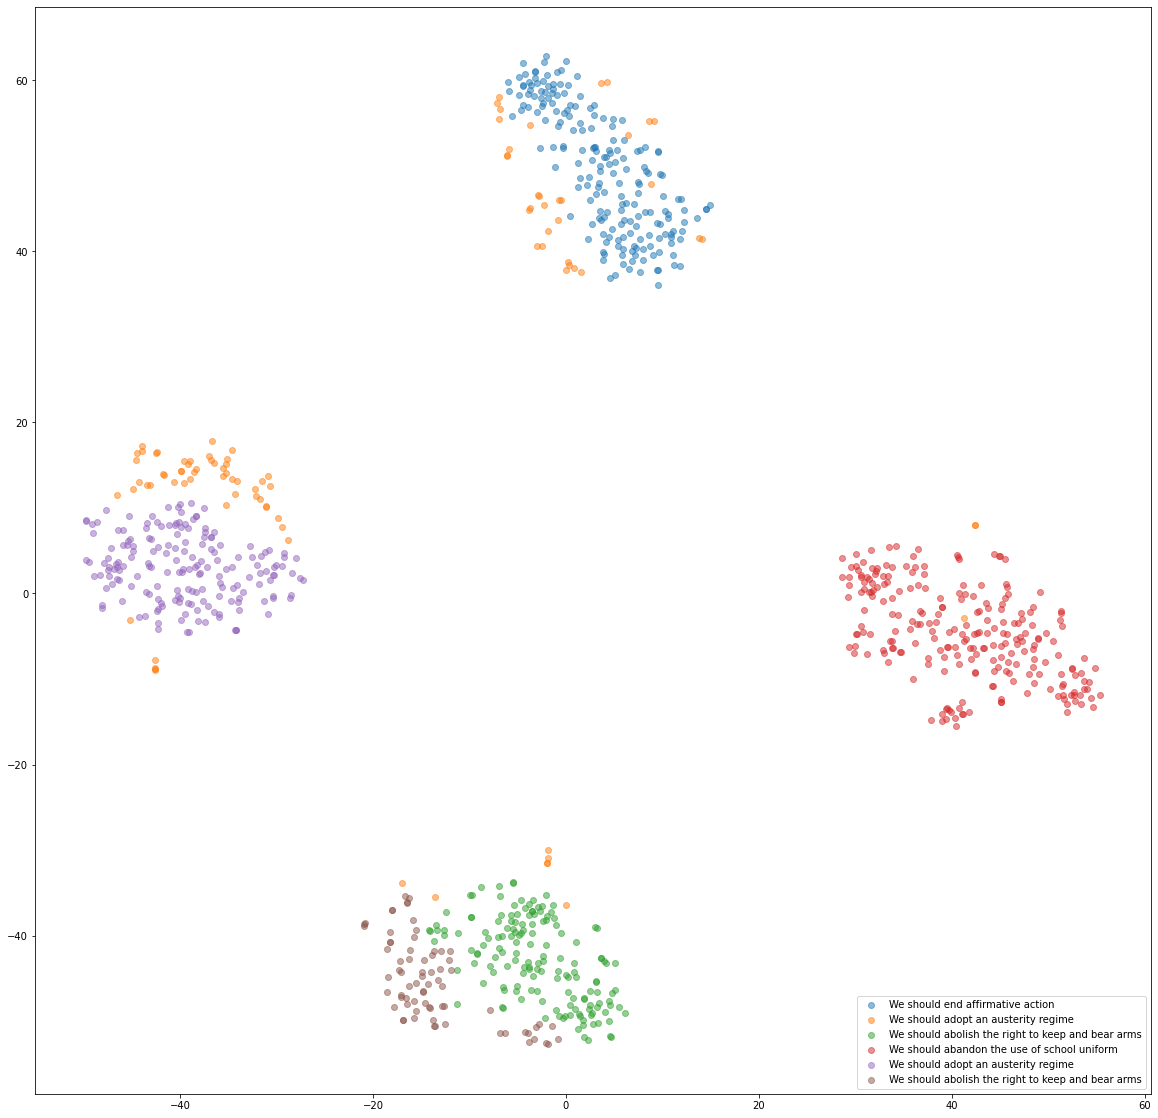

In [51]:
plt.figure(figsize=(20, 20))
for cluster_id in topic_cluster_id_series:
  topic = cluster_id_topic_series.loc[cluster_id]
  plt.scatter(merged_df[merged_df['cluster_id']==cluster_id]['tsne_30_x'], merged_df[merged_df['cluster_id']==cluster_id]['tsne_30_y'], alpha=.5, label = topic) 
plt.legend(loc='lower right')

## Misclassified arguments

In [52]:
merged_df.head(2)

,arg_id,argument,topic,stance,embedding,tsne_10_x,tsne_10_y,tsne_20_x,tsne_20_y,tsne_30_x,tsne_30_y,cluster_id
0,arg_4_0,having a school uniform can reduce bullying as...,We should abandon the use of school uniform,-1,"[-0.01057777, 0.15846351, 0.07416532, -0.05703...",30.165625,-3.639295,53.033607,-23.780943,40.296482,-14.603050,3
1,arg_4_1,it is a good way to instill discipline,We should abandon the use of school uniform,-1,"[0.017484298, 0.096222796, 0.011364501, 0.0203...",-28.317699,18.129297,-34.708897,-6.398813,-30.829950,13.742941,1


In [53]:
merged_df['topic_matches_cluster'] = merged_df.apply(lambda x: x['topic']==cluster_id_topic_series.loc[x['cluster_id']],axis=1)
merged_df.head(2)

,arg_id,argument,topic,stance,embedding,tsne_10_x,tsne_10_y,tsne_20_x,tsne_20_y,tsne_30_x,tsne_30_y,cluster_id,topic_matches_cluster
0,arg_4_0,having a school uniform can reduce bullying as...,We should abandon the use of school uniform,-1,"[-0.01057777, 0.15846351, 0.07416532, -0.05703...",30.165625,-3.639295,53.033607,-23.780943,40.296482,-14.603050,3,True
1,arg_4_1,it is a good way to instill discipline,We should abandon the use of school uniform,-1,"[0.017484298, 0.096222796, 0.011364501, 0.0203...",-28.317699,18.129297,-34.708897,-6.398813,-30.829950,13.742941,1,False


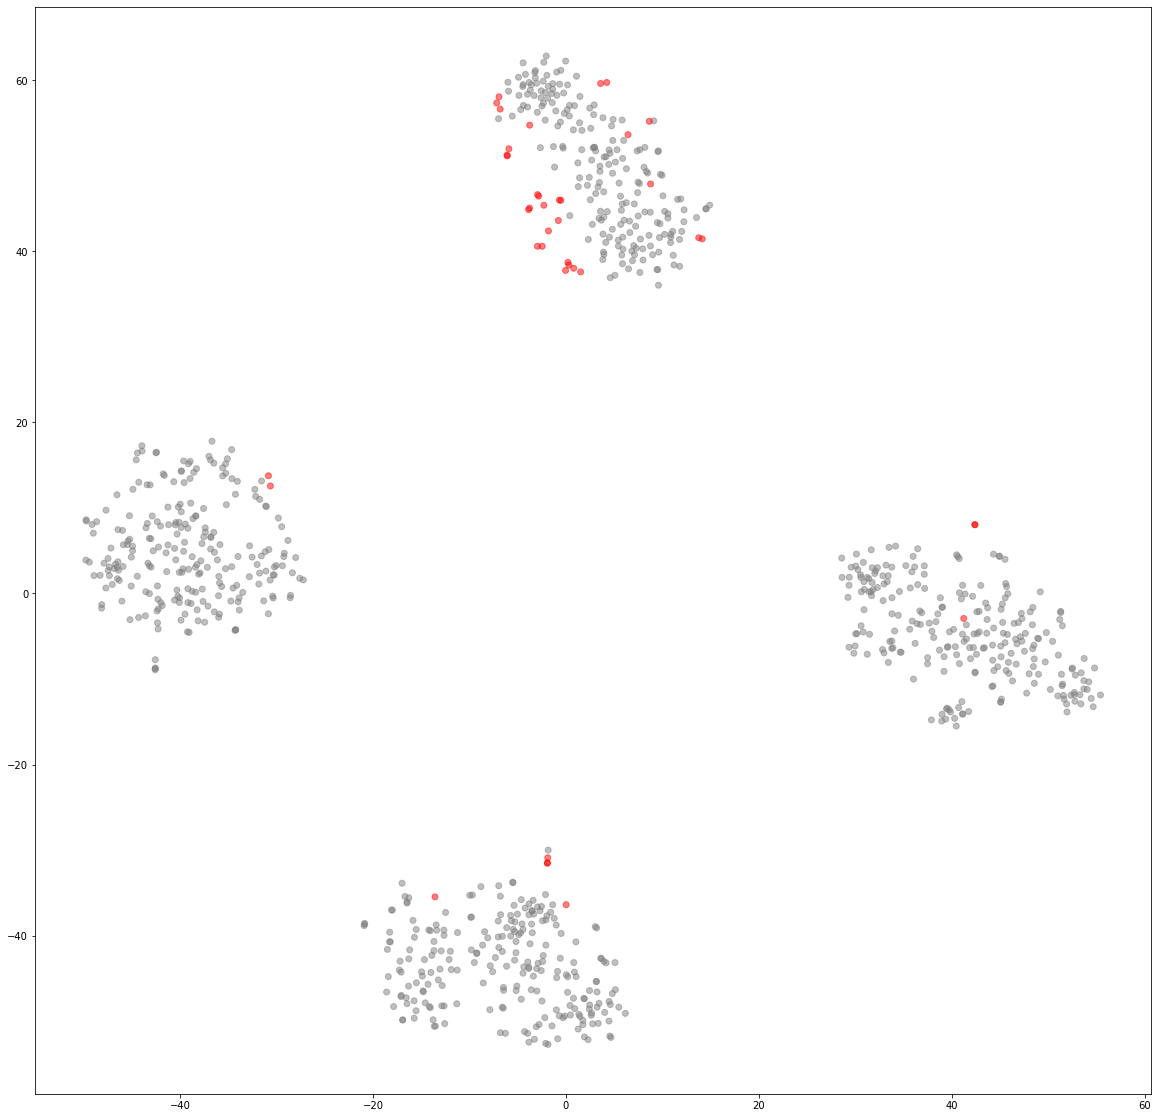

In [54]:
import matplotlib.colors as clrs

cmap = clrs.ListedColormap(['red', 'gray'])

plt.figure(figsize=(20, 20))
plt.scatter(merged_df['tsne_30_x'], merged_df['tsne_30_y'], c = (merged_df['topic_matches_cluster']==True), alpha=.5, cmap=cmap)

In [55]:
merged_df['pred_topic'] = merged_df['cluster_id'].apply(lambda x: cluster_id_topic_series.loc[x])
merged_df.head(2)

,arg_id,argument,topic,stance,embedding,tsne_10_x,tsne_10_y,tsne_20_x,tsne_20_y,tsne_30_x,tsne_30_y,cluster_id,topic_matches_cluster,pred_topic
0,arg_4_0,having a school uniform can reduce bullying as...,We should abandon the use of school uniform,-1,"[-0.01057777, 0.15846351, 0.07416532, -0.05703...",30.165625,-3.639295,53.033607,-23.780943,40.296482,-14.603050,3,True,We should abandon the use of school uniform
1,arg_4_1,it is a good way to instill discipline,We should abandon the use of school uniform,-1,"[0.017484298, 0.096222796, 0.011364501, 0.0203...",-28.317699,18.129297,-34.708897,-6.398813,-30.829950,13.742941,1,False,We should adopt an austerity regime


# Confusion matrix

In [56]:
confusion_matrix = pd.crosstab(merged_df['topic'],merged_df['pred_topic'], rownames=['Actual'],colnames=['Predicted'])
# in case predicted amount does not match actual amount e.g. no predictions for one actual topic
for index in confusion_matrix.index:
  if index not in confusion_matrix.columns:
    confusion_matrix[index] = 0
confusion_matrix = confusion_matrix[confusion_matrix.index]
confusion_matrix

Predicted,We should abandon the use of school uniform,We should abolish the right to keep and bear arms,We should adopt an austerity regime,We should end affirmative action
Actual,,,,
We should abandon the use of school uniform,236,0,2,0
We should abolish the right to keep and bear arms,0,229,4,0
We should adopt an austerity regime,0,0,234,0
We should end affirmative action,0,0,34,193


In [57]:
confusion_matrix_np = confusion_matrix.to_numpy()
true_pos = np.diag(confusion_matrix_np)
print(f"True positives: {true_pos}")

false_pos = np.sum(confusion_matrix_np, axis=1) - true_pos
false_neg = np.sum(confusion_matrix_np, axis=0) - true_pos

print(f"Fasle positives: {false_pos}")
print(f"False negatives: {false_neg}")

precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Macroaverage precision {precision.mean()}")
print(f"Macroaverage recall {recall.mean()}")

True positives: [236 229 234 193]
Fasle positives: [ 2  4  0 34]
False negatives: [ 0  0 40  0]
Precision: [0.99159664 0.98283262 1.         0.85022026]
Recall: [1.        1.        0.8540146 1.       ]
Macroaverage precision 0.9561623802495984
Macroaverage recall 0.9635036496350364
